In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Features
    1.Apps Number of applications received
    2.Accept Number of applications accepted
    3.Enroll Number of new students enrolled
    4.Top10perc Pct. new students from top 10% of H.S. class
    5.Top25perc Pct. new students from top 25% of H.S. class
    6.F.Undergrad Number of fulltime undergraduates
    7.P.Undergrad Number of parttime undergraduates
    8.Outstate Out-of-state tuition
    9.Room.Board Room and board costs
    10.Books Estimated book costs
    11.Personal Estimated personal spending
    12.PhD Pct. of faculty with Ph.D.’s
    13.Terminal Pct. of faculty with terminal degree
    14.S.F.Ratio Student/faculty ratio
    15.perc.alumni Pct. alumni who donate
    16.Expend Instructional expenditure per student
    17.Grad.Rate Graduation rate

In [3]:
df = pd.read_csv('./Universities/data.csv').drop('private', axis = 1)
display(df.head(2))
print('Shape of Data is:', df.shape)

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


Shape of Data is: (777, 17)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   apps         777 non-null    int64  
 1   accept       777 non-null    int64  
 2   enroll       777 non-null    int64  
 3   top10perc    777 non-null    int64  
 4   top25perc    777 non-null    int64  
 5   f_undergrad  777 non-null    int64  
 6   p_undergrad  777 non-null    int64  
 7   outstate     777 non-null    int64  
 8   room_board   777 non-null    int64  
 9   books        777 non-null    int64  
 10  personal     777 non-null    int64  
 11  phd          777 non-null    int64  
 12  terminal     777 non-null    int64  
 13  s_f_ratio    777 non-null    float64
 14  perc_alumni  777 non-null    int64  
 15  expend       777 non-null    int64  
 16  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [5]:
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [6]:
#checking for nulls
print('The Data has a total of {} nulls'.format(df.isnull().sum().sum()))

The Data has a total of 0 nulls


In [7]:
#checking for duplicated rows
print('The number of duplicated rows:{}'.format(df.duplicated().sum()))

The number of duplicated rows:0


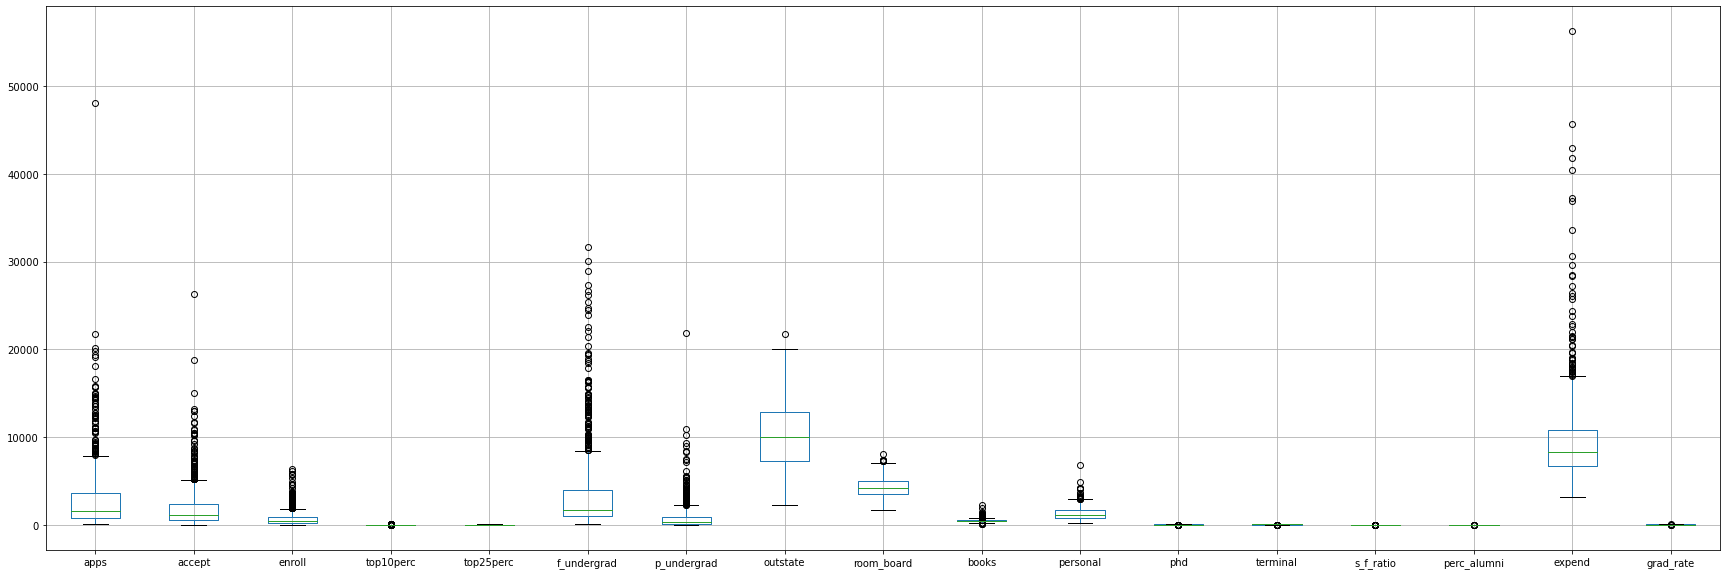

In [8]:
#Checking Outliers
df.boxplot(figsize=(30,10));

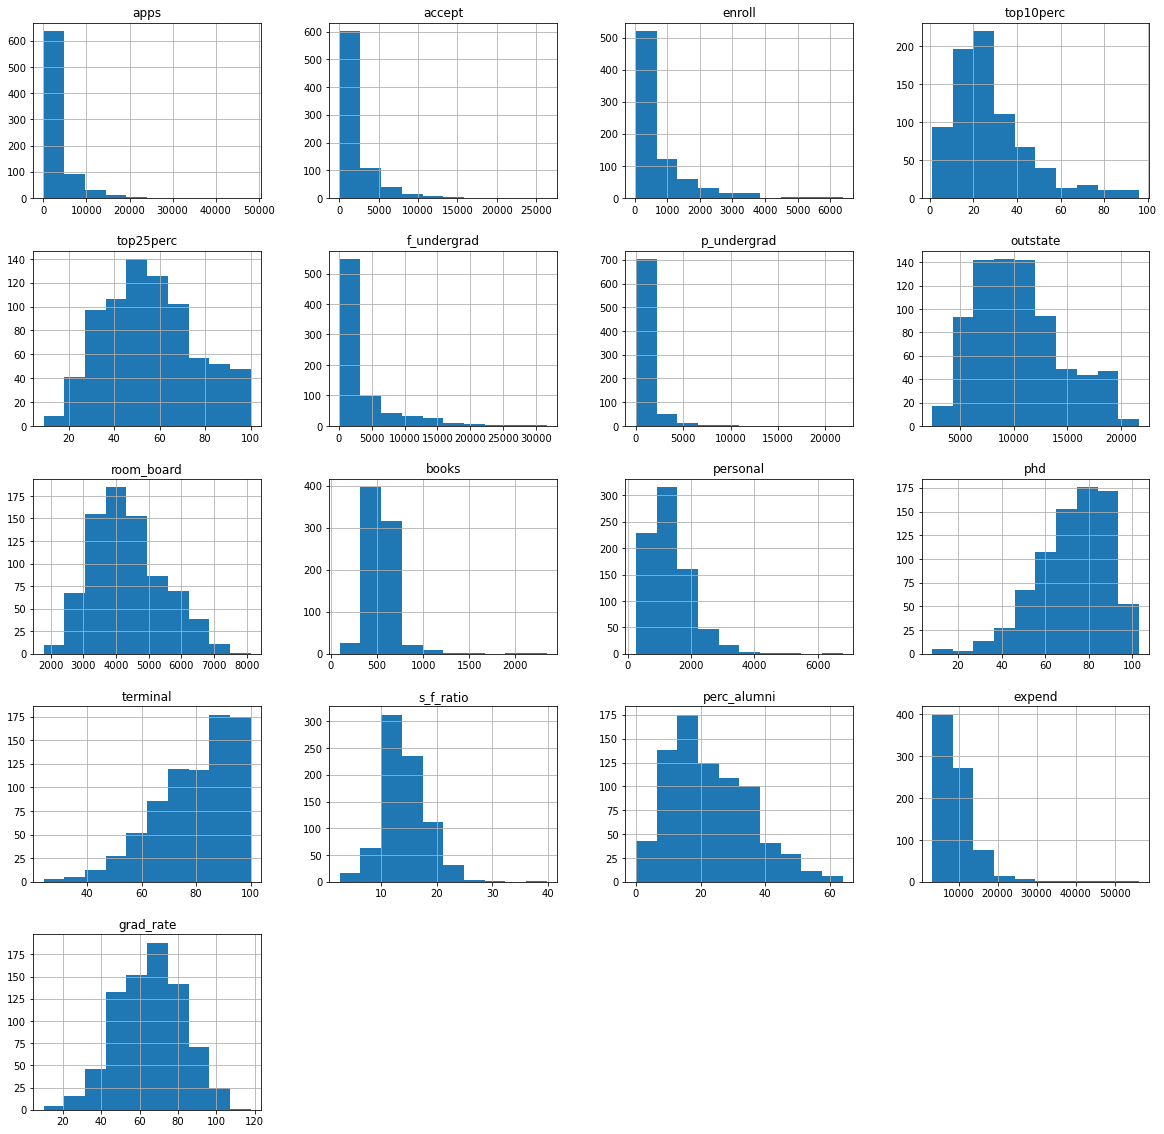

In [9]:
#Checking Skewness

df.hist(figsize=(20,20));

In [10]:
# Remove Oultiers 

def iqr_fence(data_frame, column):
    '''Function To calculate upper and lower bound of a box plot'''
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.8 * IQR)
    Upper_Fence = Q3 + (1.8 * IQR)
    u = max(data_frame[column][data_frame[column]<Upper_Fence])
    l = min(data_frame[column][data_frame[column]>Lower_Fence])
    data_frame = data_frame[data_frame[column] > l]
    data_frame = data_frame[data_frame[column] < u]
    
    return data_frame

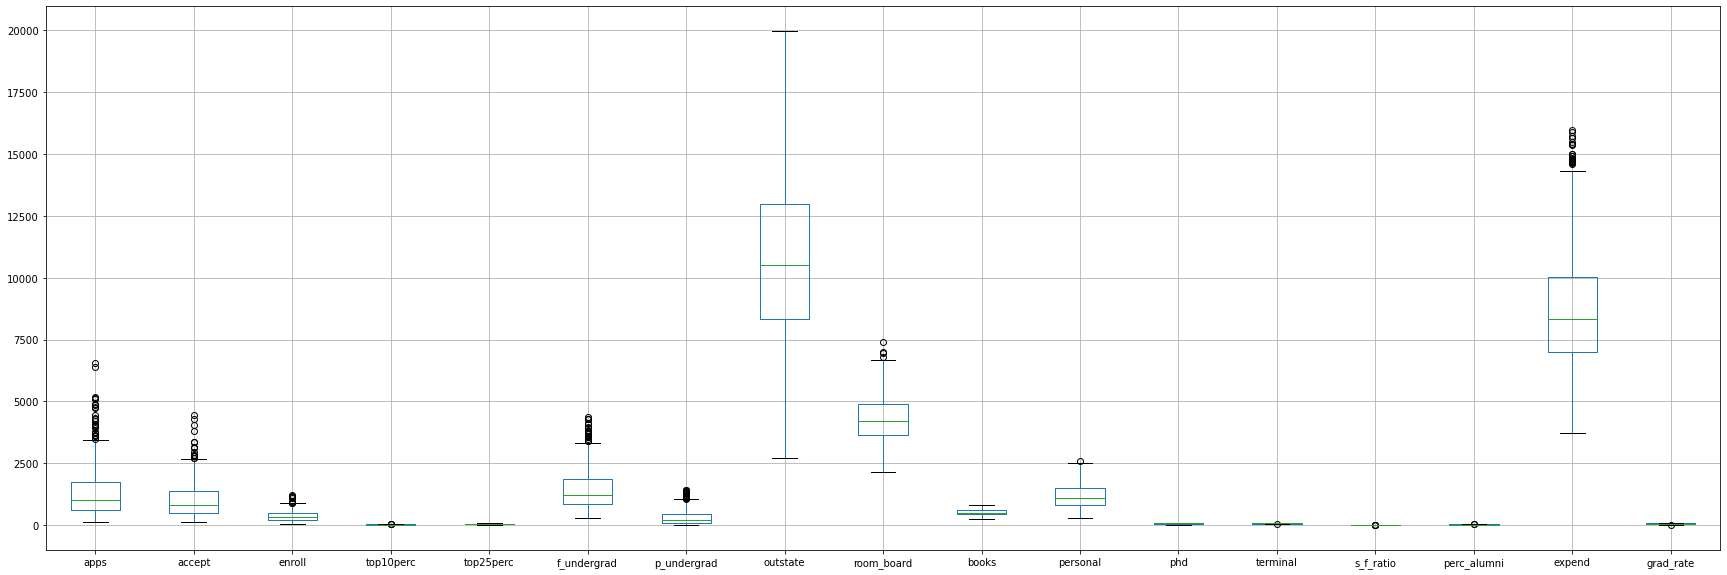

In [11]:
columns = df.columns

for column in columns:
    df = iqr_fence(df, column)
    
#Checking Outliers
df.boxplot(figsize=(30,10));

In [12]:
# Solving Skewness

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_featuers = scaler.fit_transform(df)

In [13]:
scaled_df = pd.DataFrame(scaled_featuers, columns=df.columns)
scaled_df.head(2)

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,0.290380,0.319480,1.699631,-0.170363,-0.081603,1.637871,0.671520,-0.933684,-1.047539,-0.661105,2.063130,0.013109,0.073989,1.760657,-1.106074,-0.667730,-0.395740
1,0.069507,0.127297,-0.136168,-0.248657,-0.196461,-0.503716,-0.704317,0.155130,-0.586002,-1.171588,-0.052145,-1.150383,-0.798334,-0.228495,0.488804,-0.002615,-0.781318


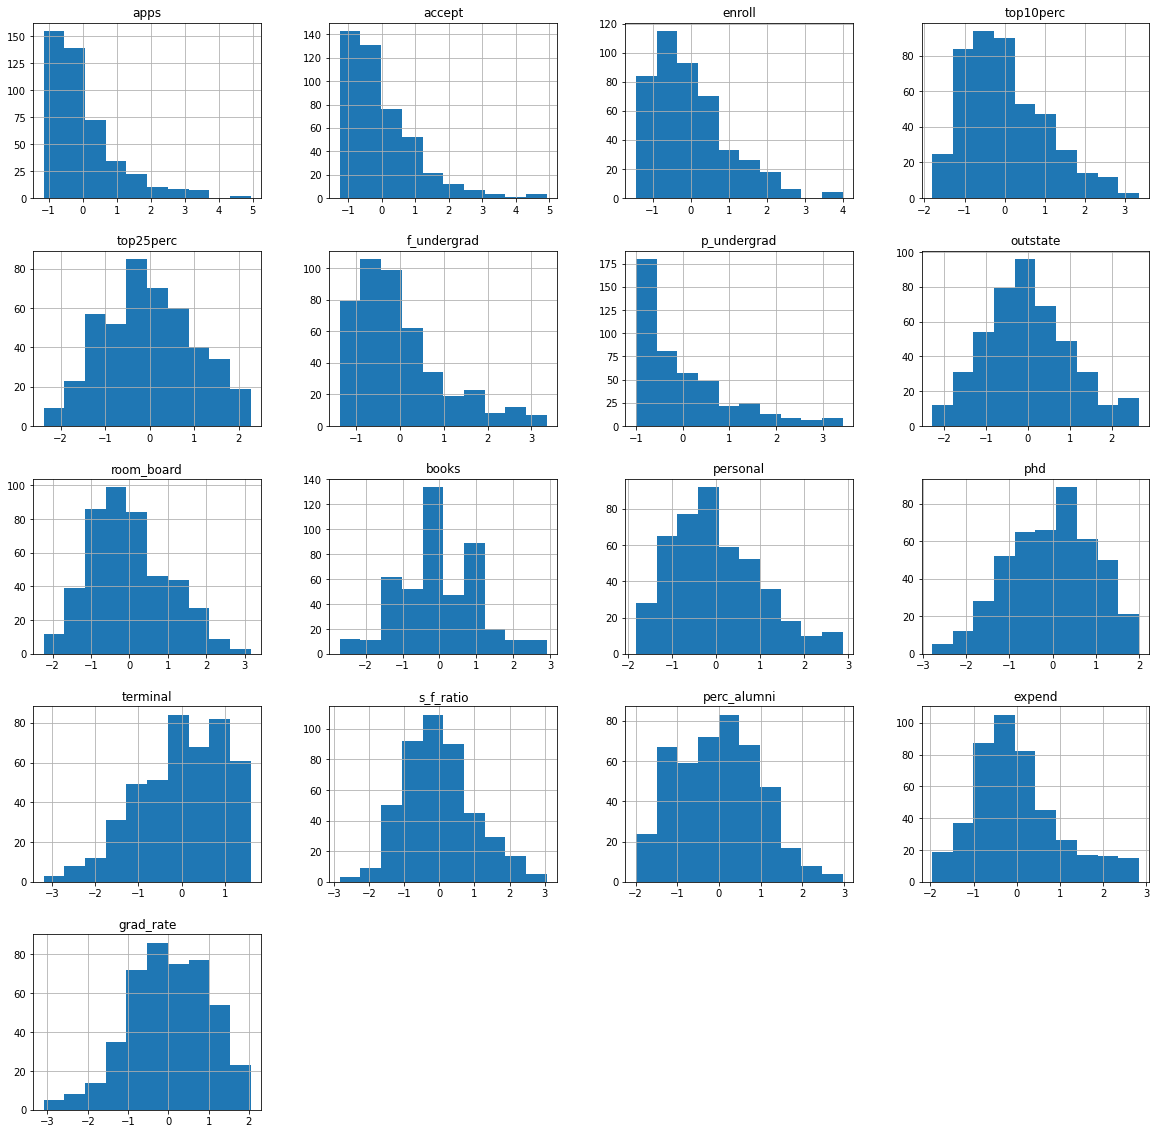

In [14]:
scaled_df.hist(figsize=(20,20));

# Clustering Algorithms

In [15]:
results_df = pd.DataFrame(columns=['Without PCA', 'With PCA'])

## PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(10)
transformed_data = pca.fit_transform(scaled_df)
print(pca.explained_variance_ratio_)

print()
pca = PCA(4)
transformed_data = pca.fit_transform(scaled_df)
print(pca.explained_variance_ratio_)

[0.33893694 0.20181594 0.0835444  0.06358047 0.05496302 0.04905193
 0.0449987  0.04032528 0.03208313 0.02968575]

[0.33893694 0.20181594 0.0835444  0.06358047]


In [ ]:
pca.explained_variance_ratio_

## KMeans
### Without PCA

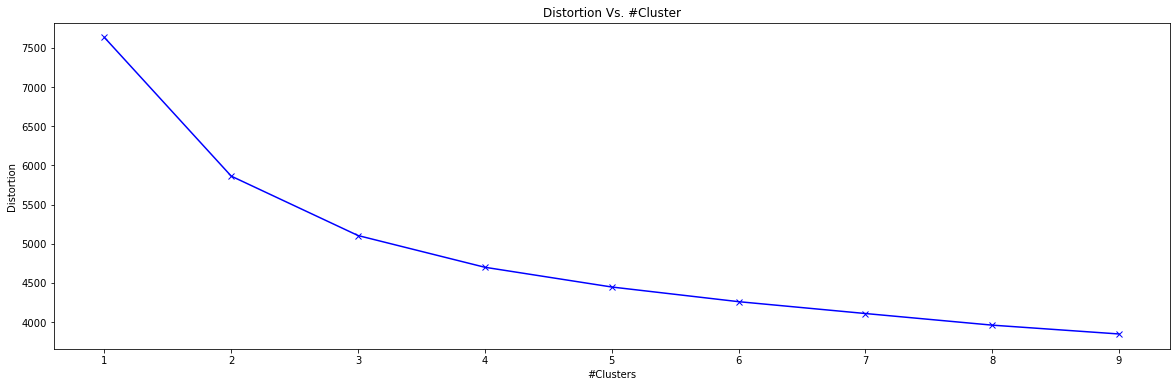

In [17]:
#elbow
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


results = []
n_clusters = 10


for cluster in range(1,n_clusters):
    km_clstr = KMeans(cluster)
    km_clstr.fit(scaled_df)
    results.append(km_clstr.inertia_)
    
    
plt.figure(figsize=(20,6));
plt.title('Distortion Vs. #Cluster');
plt.xlabel('#Clusters');
plt.ylabel("Distortion");
plt.plot(list(range(1,n_clusters)), results, 'bx-');


#### from graph 4 clusters seems a good fit

In [18]:
km_clstr = KMeans(4)
labels = km_clstr.fit_predict(scaled_df)
print('silhouette_score without PCA: ',silhouette_score(scaled_df, labels))
results_df.loc['KMeans', 'Without PCA'] = silhouette_score(scaled_df, labels)

silhouette_score without PCA:  0.14506176014834524


### With PCA

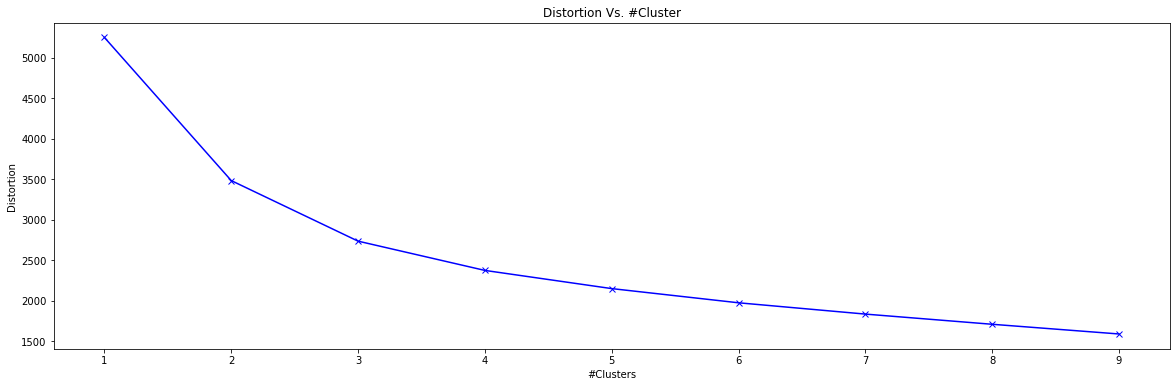

In [19]:
#elbow
results = []
n_clusters = 10


for cluster in range(1,n_clusters):
    km_clstr = KMeans(cluster)
    km_clstr.fit(transformed_data)
    results.append(km_clstr.inertia_)
    
    
plt.figure(figsize=(20,6));
plt.title('Distortion Vs. #Cluster');
plt.xlabel('#Clusters');
plt.ylabel("Distortion");
plt.plot(list(range(1,n_clusters)), results, 'bx-');

#### from graph 5 clusters seems a good fit

In [20]:
km_clstr = KMeans(5)
labels = km_clstr.fit_predict(transformed_data)
print('silhouette_score with PCA: ',silhouette_score(transformed_data, labels))
results_df.loc['KMeans', 'With PCA'] = silhouette_score(transformed_data, labels)

silhouette_score with PCA:  0.21297826461829503


## Agglomerative Clustering 
### Without PCA

In [21]:
from sklearn.cluster import AgglomerativeClustering

clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(scaled_df)
print('silhouette_score without PCA: ',silhouette_score(scaled_df, clstr.labels_))

silhouette_score without PCA:  0.16297569114498875


In [22]:
clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(scaled_df)
print('silhouette_score without PCA: ',silhouette_score(scaled_df, clstr.labels_))

silhouette_score without PCA:  0.191082459193073


In [23]:
clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(scaled_df)
print('silhouette_score without PCA: ',silhouette_score(scaled_df, clstr.labels_))

silhouette_score without PCA:  0.4398781667195277


In [24]:
clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(scaled_df)
print('silhouette_score without PCA: ',silhouette_score(scaled_df, clstr.labels_))

silhouette_score without PCA:  0.36805174663241974


#### Best Results Comes from Average Linkage

In [25]:
clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(scaled_df)
results_df.loc['Agglomerative', 'Without PCA'] = silhouette_score(scaled_df, clstr.labels_)

### With PCA

In [26]:
clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(transformed_data)
print('silhouette_score with PCA: ',silhouette_score(transformed_data, clstr.labels_))

silhouette_score with PCA:  0.2731121769184533


In [27]:
clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(transformed_data)
print('silhouette_score with PCA: ',silhouette_score(transformed_data, clstr.labels_))

silhouette_score with PCA:  0.2735717450566337


In [28]:
clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit(transformed_data)
print('silhouette_score with PCA: ',silhouette_score(transformed_data, clstr.labels_))

silhouette_score with PCA:  0.5045815383708856


In [29]:
clstr = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(transformed_data)
print('silhouette_score with PCA: ',silhouette_score(transformed_data, clstr.labels_))

silhouette_score with PCA:  0.5045815383708856


#### Best Results Comes from Single Linkage


In [30]:
results_df.loc['Agglomerative', 'With PCA'] = silhouette_score(transformed_data, clstr.labels_)

In [31]:
results_df

,Without PCA,With PCA
KMeans,0.145062,0.212978
Agglomerative,0.439878,0.504582


## DBSCAN
### Without PCA

In [32]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 5, min_samples = 25).fit(scaled_df)
print('silhouette_score without PCA: ',silhouette_score(scaled_df, db.labels_))
results_df.loc['DBSCAN', 'Without PCA'] = silhouette_score(scaled_df, db.labels_)

silhouette_score without PCA:  0.39250179757523396


### With PCA

In [33]:
db = DBSCAN(eps = 3.8, min_samples = 20).fit(transformed_data)
print('silhouette_score with PCA: ',silhouette_score(transformed_data, db.labels_))
results_df.loc['DBSCAN', 'With PCA'] = silhouette_score(transformed_data, db.labels_)

silhouette_score with PCA:  0.5228692579553628


## Gaussian Mixture
### Without PCA

In [34]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(2).fit(scaled_df)
labels = gm.predict(scaled_df)
print('silhouette_score without PCA: ', silhouette_score(scaled_df, labels))
results_df.loc['Gaussian', 'Without PCA'] = silhouette_score(scaled_df, labels)

silhouette_score without PCA:  0.16547784295988208


### With PCA

In [35]:
gm = GaussianMixture(2).fit(transformed_data)
labels = gm.predict(transformed_data)
print('silhouette_score without PCA: ', silhouette_score(transformed_data, labels))
results_df.loc['Gaussian', 'With PCA'] = silhouette_score(transformed_data, labels)

silhouette_score without PCA:  0.2891165516915265


# Conclusion

In [36]:
results_df

,Without PCA,With PCA
KMeans,0.145062,0.212978
Agglomerative,0.439878,0.504582
DBSCAN,0.392502,0.522869
Gaussian,0.165478,0.289117


Best Result Achieved with DBSCAN and PCA 